In [1]:
import scipy.io
import re
import numpy as np
from collections import Counter
import os
import mne
from sklearn.utils import shuffle

In [2]:
dir = './registros_limpios/Auditivo_Emociones/TD32A.mat'
mat = scipy.io.loadmat('MR001A.mat')

mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 22 13:59:07 2024',
 '__version__': '1.0',
 '__globals__': [],
 'matriz_resultante': array([[ -624.4,  -628.9,  -634.1, ...,  -535.2,  -533.2,  -531.5],
        [ -679.2,  -681.3,  -682.8, ...,  -644.7,  -642.6,  -641.2],
        [ -688.5,  -689.5,  -689.7, ...,  -623.5,  -621.2,  -619.3],
        ...,
        [ -678.2,  -680.5,  -681.9, ...,  -638.4,  -636.4,  -634.8],
        [ -659.9,  -660.7,  -660.9, ...,  -620.3,  -617.4,  -616.2],
        [ -602.7,  -622.8,  -672.3, ..., -1078.7,  -836.1,  -536.3]])}

In [3]:
dato = mat['matriz_resultante']
print(dato.shape)
dato

(32, 96000)


array([[ -624.4,  -628.9,  -634.1, ...,  -535.2,  -533.2,  -531.5],
       [ -679.2,  -681.3,  -682.8, ...,  -644.7,  -642.6,  -641.2],
       [ -688.5,  -689.5,  -689.7, ...,  -623.5,  -621.2,  -619.3],
       ...,
       [ -678.2,  -680.5,  -681.9, ...,  -638.4,  -636.4,  -634.8],
       [ -659.9,  -660.7,  -660.9, ...,  -620.3,  -617.4,  -616.2],
       [ -602.7,  -622.8,  -672.3, ..., -1078.7,  -836.1,  -536.3]])

In [109]:
sampling_rate = 500
info = mne.create_info(ch_names=[f"ch_{i + 1}" for i in range(dato.shape[0])],
                       sfreq=sampling_rate,
                       ch_types='eeg')

raw = mne.io.RawArray(dato, info)

Creating RawArray with float64 data, n_channels=32, n_times=96000
    Range : 0 ... 95999 =      0.000 ...   191.998 secs
Ready.


Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


C:\Users\Ricardo\AppData\Local\Temp\ipykernel_16432\4108630121.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
c:\Users\Ricardo\miniconda3\envs\tfdml_plugin\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


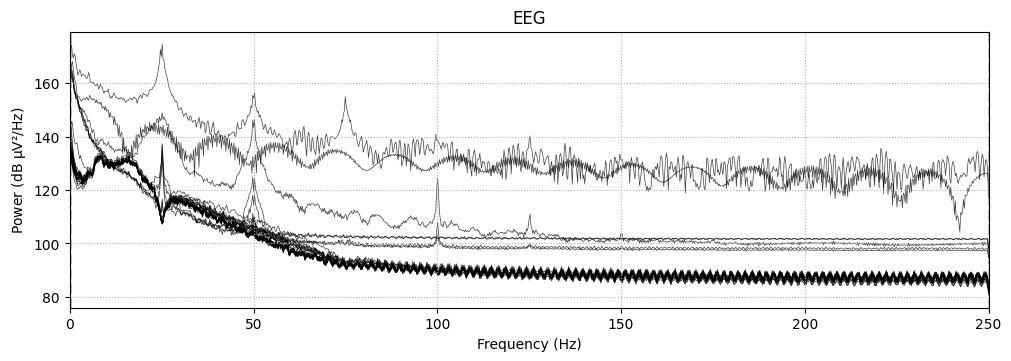

In [111]:
raw.compute_psd().plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\Ricardo\AppData\Local\Temp\ipykernel_16432\3612561660.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
c:\Users\Ricardo\miniconda3\envs\tfdml_plugin\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


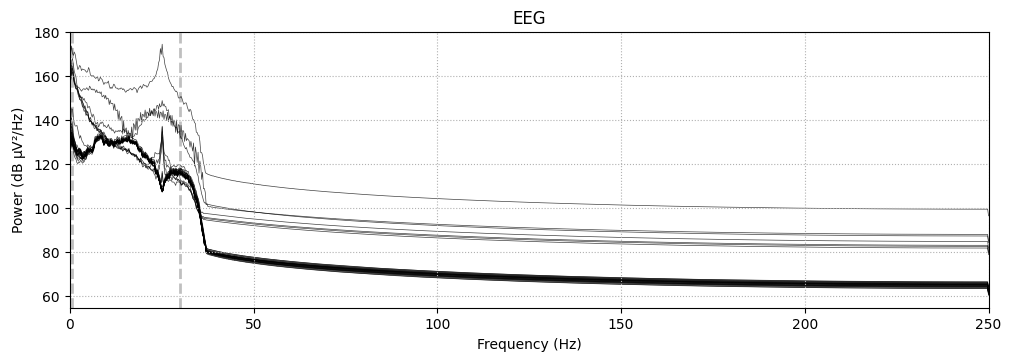

In [35]:
raw = raw.filter(0.5, 30)
raw.compute_psd().plot()

In [36]:
prueba = raw.get_data()
print(prueba.shape)

(32, 96000)


In [4]:
train = ['TD01A.mat', 'TD06A.mat', 'TD18A.mat', 'TD22A.mat', 'TD23A.mat', 'TD24A.mat', 'TD26A.mat', 'TD30A.mat', 'TD31A.mat', 'TD32A.mat']
valid = ['TD33A.mat', 'TD34A.mat', 'TD35A.mat', 'TD36A.mat']
test = ['TD37A.mat', 'TD38A.mat', 'TD39A.mat']

#train = ['MR003A.mat', 'MR009A.mat', 'MR010A.mat', 'MR012A.mat', 'MR014A.mat', 'MR015A.mat', 'MR017A.mat', 'MR023A.mat', 'MR024A.mat']
#valid = ['MR011A.mat', 'MR004A.mat', 'MR013A.mat']
#test = ['MR008A.mat', 'MR018A.mat', 'MR006A.mat']

In [5]:
dir = './registros_limpios/Auditivo_Emociones'

directory = os.fsencode(dir)

X_train, X_valid, X_test = np.array([]), np.array([]), np.array([])

c1,c2,c3 = 0,0,0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".mat"):
        mat_aux = scipy.io.loadmat(dir + '/' + filename)['matriz_resultante'].T
        if len(mat_aux) == 96000:
            if filename in train:
                if c1 == 0:
                    X_train = mat_aux
                else:
                    X_train = np.concatenate((X_train, mat_aux), axis=0)
                c1 += 1
            elif filename in valid:
                if c2 == 0:
                    X_valid = mat_aux
                else:
                    X_valid = np.concatenate((X_valid, mat_aux), axis=0)
                c2 += 1
            elif filename in test:
                if c3 == 0:
                    X_test = mat_aux
                else:
                    X_test = np.concatenate((X_test, mat_aux), axis=0)
                c3 += 1

FileNotFoundError: [Errno 2] No such file or directory: b'./registros_limpios/Auditivo_Emociones'

In [127]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(864000, 32)
(384000, 32)
(288000, 32)


In [128]:
def limpiar_ruido(X):
    sampling_rate = 500
    info = mne.create_info(ch_names=[f"ch_{i + 1}" for i in range(dato.shape[0])],
                        sfreq=sampling_rate,
                        ch_types='eeg')
    raw = mne.io.RawArray(X, info)
    raw.compute_psd().plot()
    raw = raw.filter(0.5, 30)
    ica = mne.preprocessing.ICA(n_components=None, random_state=42)
    ica.fit(raw)
    return ica.apply(raw).get_data().T

In [129]:
X_train[100]

array([-1163.7,  -653.5,  -668.6,  -651.2,   -17.9,  -699.5,  -666.6,
        -618.6,  -674.7,  -664.6,  -655.7,  -647. ,  -655.4,  -725.6,
        -797.4,  -783.4,  -835.2,  -670.5,  -735.9,  -688.5,  -775.5,
        -649.9,  -608.1,  -674. ,  -658. ,  -672.8,  -674.4,  -670.8,
        -672.9,  -651.3,  -639.2, -1614.4])

In [130]:
X_train = limpiar_ruido(X_train.copy().T)
X_valid = limpiar_ruido(X_valid.copy().T)
X_test = limpiar_ruido(X_test.copy().T)

Creating RawArray with float64 data, n_channels=32, n_times=864000
    Range : 0 ... 863999 =      0.000 ...  1727.998 secs
Ready.
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



C:\Users\Ricardo\AppData\Local\Temp\ipykernel_16432\4182632060.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
c:\Users\Ricardo\miniconda3\envs\tfdml_plugin\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 32 components
Fitting ICA took 23.8s.
Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Creating RawArray with float64 data, n_channels=32, n_times=384000
    Range : 0 ... 383999 =      0.000 ...   767.998 secs
Ready.
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_16432\4182632060.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
c:\Users\Ricardo\miniconda3\envs\tfdml_plugin\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 32 components


c:\Users\Ricardo\miniconda3\envs\tfdml_plugin\lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 254.9s.
Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Creating RawArray with float64 data, n_channels=32, n_times=288000
    Range : 0 ... 287999 =      0.000 ...   575.998 secs
Ready.
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



C:\Users\Ricardo\AppData\Local\Temp\ipykernel_16432\4182632060.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
c:\Users\Ricardo\miniconda3\envs\tfdml_plugin\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 32 components
Fitting ICA took 7.6s.
Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


In [131]:
def generar_test(estr):
    with open('EventosAudio.txt', 'r') as f:
        y_data=[]
        n = 0
        for linea in f:
            if n != 0:
                # 0 para audio/no audio, 1 para anger/joy/neutral, 2 para anger/joy/neutral/no sonido
                cleaned_string = re.sub(r'[^a-zA-Z]', '', linea)
                if estr == 0:
                    for _ in range(500):
                        y_data.append('audio')
                    for _ in range(500):
                        y_data.append('no_audio')
                elif estr == 1:
                    for _ in range(1000):
                        y_data.append(cleaned_string)
                #elif estr == 2:
                #    for _ in range(500):
                #        y_data.append(cleaned_string)
                else:
                    for _ in range(500):
                        y_data.append(cleaned_string)
                    for _ in range(500):
                        y_data.append('no_audio')
            n += 1     
    
    return y_data*int(X_train.shape[0]/96000), y_data*int(X_valid.shape[0]/96000), y_data*int(X_test.shape[0]/96000)

In [132]:
y_train, y_valid, y_test = generar_test(1)

print(len(y_train))
print(len(y_valid))
print(len(y_test))

conteo = {}
for elemento in y_train:
    conteo[elemento] = conteo.get(elemento, 0) + 1
print(conteo)

864000
384000
288000
{'anger': 288000, 'joy': 288000, 'neutral': 288000}


In [133]:
def apply_sliding_window(X, y, window_size, step_size):
    y_res = []
    X_res = []
    posicion = 0
    stride = window_size - step_size
    total = len(y)
    
    while (posicion + window_size < total):
        y_aux = []
        X_aux = []
        
        for _ in range(window_size):
            y_aux.append(y[posicion])
            X_aux.append(X[posicion])
            posicion += 1
        
        valor_mas_comun = Counter(y_aux).most_common(1)
        y_res.append(valor_mas_comun[0][0])

        X_res.append(np.asarray(X_aux))

        posicion -= stride    
    
    return np.asarray(X_res), np.asarray(y_res)

In [134]:
X_train, y_train = apply_sliding_window(X_train, y_train, window_size=100, step_size=50)
X_valid, y_valid = apply_sliding_window(X_valid, y_valid, window_size=100, step_size=50)
X_test, y_test = apply_sliding_window(X_test, y_test, window_size=100, step_size=50)

X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(17278, 100, 32)
(7678, 100, 32)
(5758, 100, 32)


In [135]:
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(17278,)
(7678,)
(5758,)


In [136]:
lista_final = [X_train, X_valid, X_test, y_train, y_valid, y_test]

with open('dataset_X_y_sliding_window.npy', 'wb') as f:
    np.save(f, np.array(lista_final, dtype=object))

In [7]:
dir = './registros/Tabla/Correctos'

directory = os.fsencode(dir)

X_train = np.array([])
X_valid = np.array([])
X_test = np.array([])
y_train = []
y_valid = []
y_test = []

c=0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".mat"):
        mat_aux = scipy.io.loadmat(dir + '/' + filename)['matriz_resultante'].T

        if len(mat_aux) == 96000:
            val3 = len(mat_aux)
            val1 = int(val3*0.6)
            val2 = int(val3*0.6 + val3*0.2)

            if c == 0:
                X_train = mat_aux[0:val1]
                X_valid = mat_aux[val1:val2]
                X_test = mat_aux[val2:val3]
            else:
                X_train = np.concatenate((X_train, mat_aux[0:val1]), axis=0)
                X_valid = np.concatenate((X_valid, mat_aux[val1:val2]), axis=0)
                X_test = np.concatenate((X_test, mat_aux[val2:val3]), axis=0)
            c += 1

def generar_test(estr):
    with open('EventosAudio.txt', 'r') as f:
        y_data=[]
        n = 0
        for linea in f:
            if n != 0:
                # 0 para audio/no audio, 1 para anger/joy/neutral, 2 para anger/joy/neutral/no sonido
                cleaned_string = re.sub(r'[^a-zA-Z]', '', linea)
                if estr == 0:
                    for _ in range(500):
                        y_data.append('audio')
                    for _ in range(500):
                        y_data.append('no_audio')
                elif estr == 1:
                    for _ in range(1000):
                        y_data.append(cleaned_string)
                else:
                    for _ in range(500):
                        y_data.append(cleaned_string)
                    for _ in range(500):
                        y_data.append('no_audio')
            n += 1    

    val3 = len(mat_aux)
    val1 = int(val3*0.6)
    val2 = int(val3*0.6 + val3*0.2)

    return y_data[0:val1]*c, y_data[val1:val2]*c, y_data[val2:val3]*c

In [8]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(864000, 32)
(288000, 32)
(288000, 32)


In [9]:
y_train, y_valid, y_test = generar_test(1)

In [10]:
print(len(y_train))
print(len(y_valid))
print(len(y_test))

846000
282000
282000


In [11]:
X_train, y_train = apply_sliding_window(X_train, y_train, window_size=100, step_size=8)
X_valid, y_valid = apply_sliding_window(X_valid, y_valid, window_size=100, step_size=8)
X_test, y_test = apply_sliding_window(X_test, y_test, window_size=100, step_size=8)

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(105738,)
(35238,)
(35238,)


In [12]:
lista_final = [X_train, X_valid, X_test, y_train, y_valid, y_test]

with open('dataset_X_y_sliding_window.npy', 'wb') as f:
    np.save(f, np.array(lista_final, dtype=object))